In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [7]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [8]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.4500625793011847

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897085

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [21]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.50)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.50)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.32139788632985944

Parameter estimates for the model with few features:
[-0.         -0.25561356 -0.          0.00220588]

R² for the model with many features:
0.3082496073309633

Parameter estimates for the model with many features:
[ 0.00000000e+00 -2.30499742e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.91693116e-04
 -2.45208452e-06  4.37132245e+00]


In [13]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.40)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.40)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.4122200225449126

Parameter estimates for the model with few features:
[-0.         -0.35625603 -0.          0.00149927]

R² for the model with many features:
0.4038148555303922

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.36400437e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.39783936e-04
 -1.35165582e-06  3.75098548e+00]


In [19]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.100)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.100)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.5635902495700011

Parameter estimates for the model with few features:
[ 0.00000000e+00 -6.58183446e-01 -0.00000000e+00 -6.20577008e-04]

R² for the model with many features:
0.5630894936716484

Parameter estimates for the model with many features:
[ 0.00000000e+00 -6.54093117e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -8.12596514e-05
 -6.65147234e-08  8.78456768e-01]


In [9]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.4455322515118417
0.4380466345914474


In [28]:
np.arange(4)

array([0, 1, 2, 3])

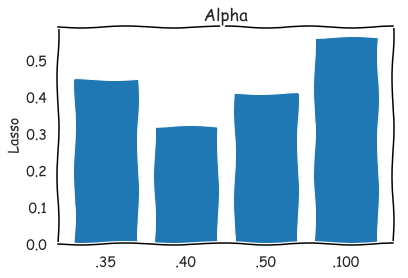

In [33]:
x_list = (0.35, 0.40, 0.50, 0.100)
y_list = (0.4500625793011847, 0.32139788632985944, 0.4122200225449126, 0.5635902495700011)

plt.bar(np.arange(4), y_list)
plt.xticks(np.arange(4), ('.35', '.40', '.50', '.100'))
plt.ylabel('Lasso')
plt.title('Alpha')

plt.xkcd() #plt.show() can be used as well
#xkcd is a comic style that is a bit of fun to play with.

In [10]:
# change the Alpha values to whatever number to determine if anything changes and what it would like it. 
# graph the different Alpha parameter results. Start small and then increase. 
# Bar chart is the best. 
# take a read on L1 and L2 on regularization. 
# Lasso is forcing the small parameter estimates to be equal to zero. It will allow the model to not overfit.
# Two types of penalization. L1 regularization is Lasso Regression. L2 regularization is Ridge Regression. Read through this

In [11]:
# building machine learning models, split the data into training and test sets
# training sets are used to create the understanding that the models are trying to learn